
Gabriel Christopher Tanod - 2602142413

DEEP LEARNING UAS NO.1



Link penjelasan:https://binusianorg-my.sharepoint.com/personal/gabriel_tanod_binus_ac_id/_layouts/15/guestaccess.aspx?share=EQiUcgGa7xpNu3pA5quWaoMBPxCOo8DItNXoad3jcJsGkQ&nav=eyJyZWZlcnJhbEluZm8iOnsicmVmZXJyYWxBcHAiOiJPbmVEcml2ZUZvckJ1c2luZXNzIiwicmVmZXJyYWxBcHBQbGF0Zm9ybSI6IldlYiIsInJlZmVycmFsTW9kZSI6InZpZXciLCJyZWZlcnJhbFZpZXciOiJNeUZpbGVzTGlua0NvcHkifX0&e=LtCiSy 

1A

In [1]:
import numpy as np
from tensorflow.keras.datasets import fashion_mnist
from sklearn.model_selection import StratifiedShuffleSplit

# Load dataset
(x_train_all, y_train_all), (x_test_all, y_test_all) = fashion_mnist.load_data()
x_all = np.concatenate([x_train_all, x_test_all])
y_all = np.concatenate([y_train_all, y_test_all])

# NIM : 2602142413 - Laki Laki
nim_parity = 'Ganjil'
gender = 'Laki-laki'

# Select classes based on attributes
if nim_parity == 'Ganjil' and gender == 'Laki-laki':
    selected_classes = [0, 1]
elif nim_parity == 'Ganjil' and gender == 'Perempuan':
    selected_classes = [2, 3]
elif nim_parity == 'Genap' and gender == 'Laki-laki':
    selected_classes = [4, 5]
elif nim_parity == 'Genap' and gender == 'Perempuan':
    selected_classes = [6, 7]
else:
    raise ValueError("Invalid input")

# Filter data
mask = np.isin(y_all, selected_classes)
x_filtered = x_all[mask]
y_filtered = y_all[mask]

# Split into train (80%), validation (10%), test (10%)
sss = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
train_idx, temp_idx = next(sss.split(x_filtered, y_filtered))
x_train, x_temp = x_filtered[train_idx], x_filtered[temp_idx]
y_train, y_temp = y_filtered[train_idx], y_filtered[temp_idx]

sss2 = StratifiedShuffleSplit(n_splits=1, test_size=0.5, random_state=42)
val_idx, test_idx = next(sss2.split(x_temp, y_temp))
x_val, x_test = x_temp[val_idx], x_temp[test_idx]
y_val, y_test = y_temp[val_idx], y_temp[test_idx]

# Preprocess data
x_train = x_train.astype('float32') / 255.0
x_val = x_val.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# Flatten images
x_train_flat = x_train.reshape((-1, 784))
x_val_flat = x_val.reshape((-1, 784))
x_test_flat = x_test.reshape((-1, 784))

print(f"Training set shape: {x_train_flat.shape}")
print(f"Validation set shape: {x_val_flat.shape}")
print(f"Test set shape: {x_test_flat.shape}")

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Training set shape: (11200, 784)
Validation set shape: (1400, 784)
Test set shape: (1400, 784)


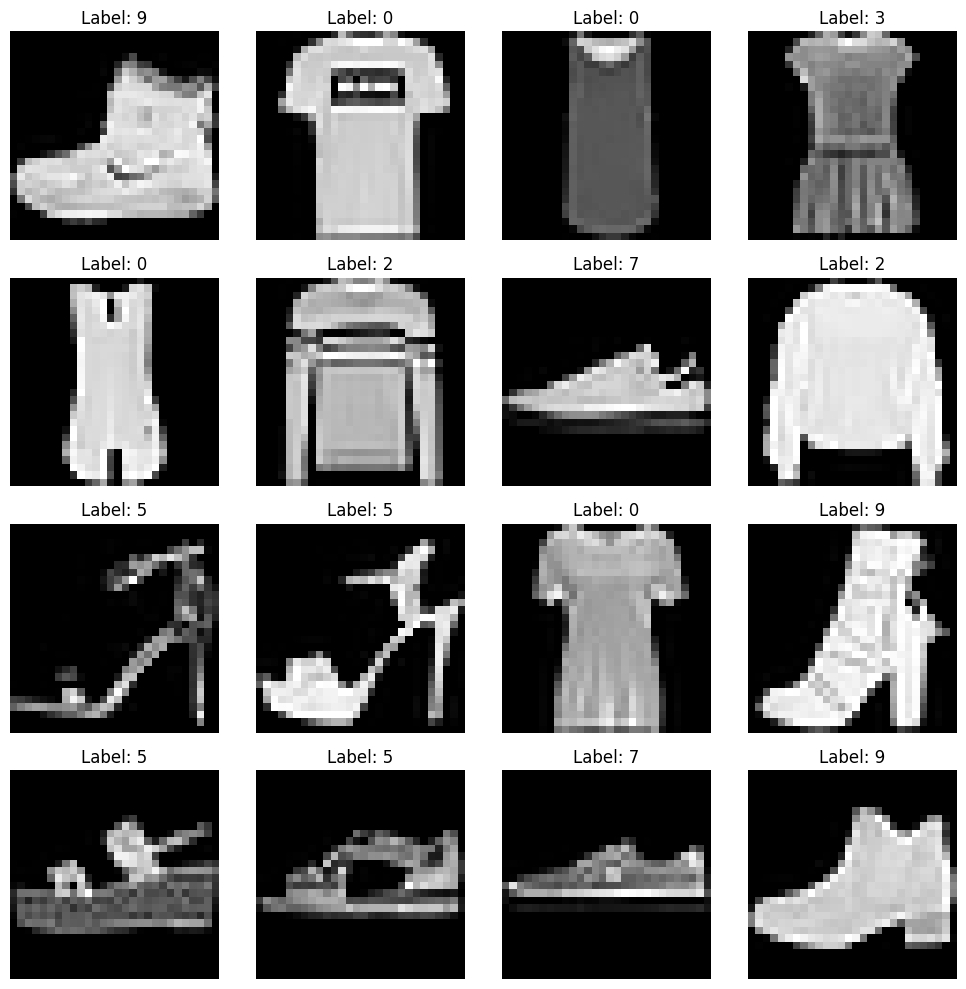

In [2]:
import matplotlib.pyplot as plt

def visualize_images(images, labels=None, num_images=16):

    plt.figure(figsize=(10, 10))
    grid_size = int(num_images**0.5)
    for i in range(num_images):
        plt.subplot(grid_size, grid_size, i + 1)
        plt.imshow(images[i].reshape(28, 28), cmap='gray')
        if labels is not None:
            plt.title(f"Label: {labels[i]}")
        plt.axis('off')
    plt.tight_layout()
    plt.show()

visualize_images(x_all[:16], labels=y_all[:16])

1B


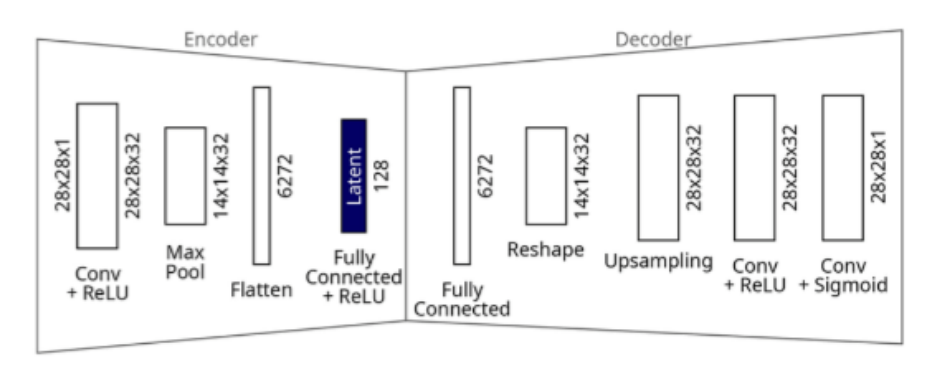

In [9]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, Reshape, UpSampling2D

# Build baseline autoencoder
# Encoder
input_img = Input(shape=(28, 28, 1))  # Input shape of images
x = Conv2D(32, (3, 3), activation='relu', padding='same')(input_img)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Flatten()(x)
latent = Dense(128, activation='relu', name="Latent")(x)  # Fully connected layer

# Decoder
x = Dense(14 * 14 * 32, activation='relu')(latent)  # Match flattened dimensions
x = Reshape((14, 14, 32))(x)
x = UpSampling2D((2, 2))(x)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x) # Conv ReLU
x = Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)  # Reconstruct to original shape

# Autoencoder Model
autoencoder = Model(input_img, x)
autoencoder.compile(optimizer='adam', loss='mse')
autoencoder.summary()

Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)           │ (None, 28, 28, 1)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_8 (Conv2D)                    │ (None, 28, 28, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 14, 14, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 6272)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Latent (Dense)                       │ (None, 128)                 │         802,944 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 6272)                │         809,088 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ reshape_2 (Reshape)                  │ (None, 14, 14, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ up_sampling2d_3 (UpSampling2D)       │ (None, 28, 28, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_9 (Conv2D)                    │ (None, 28, 28, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_10 (Conv2D)                   │ (None, 28, 28, 1)           │             289 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,621,889 (6.19 MB)

 Trainable params: 1,621,889 (6.19 MB)

 Non-trainable params: 0 (0.00 B)

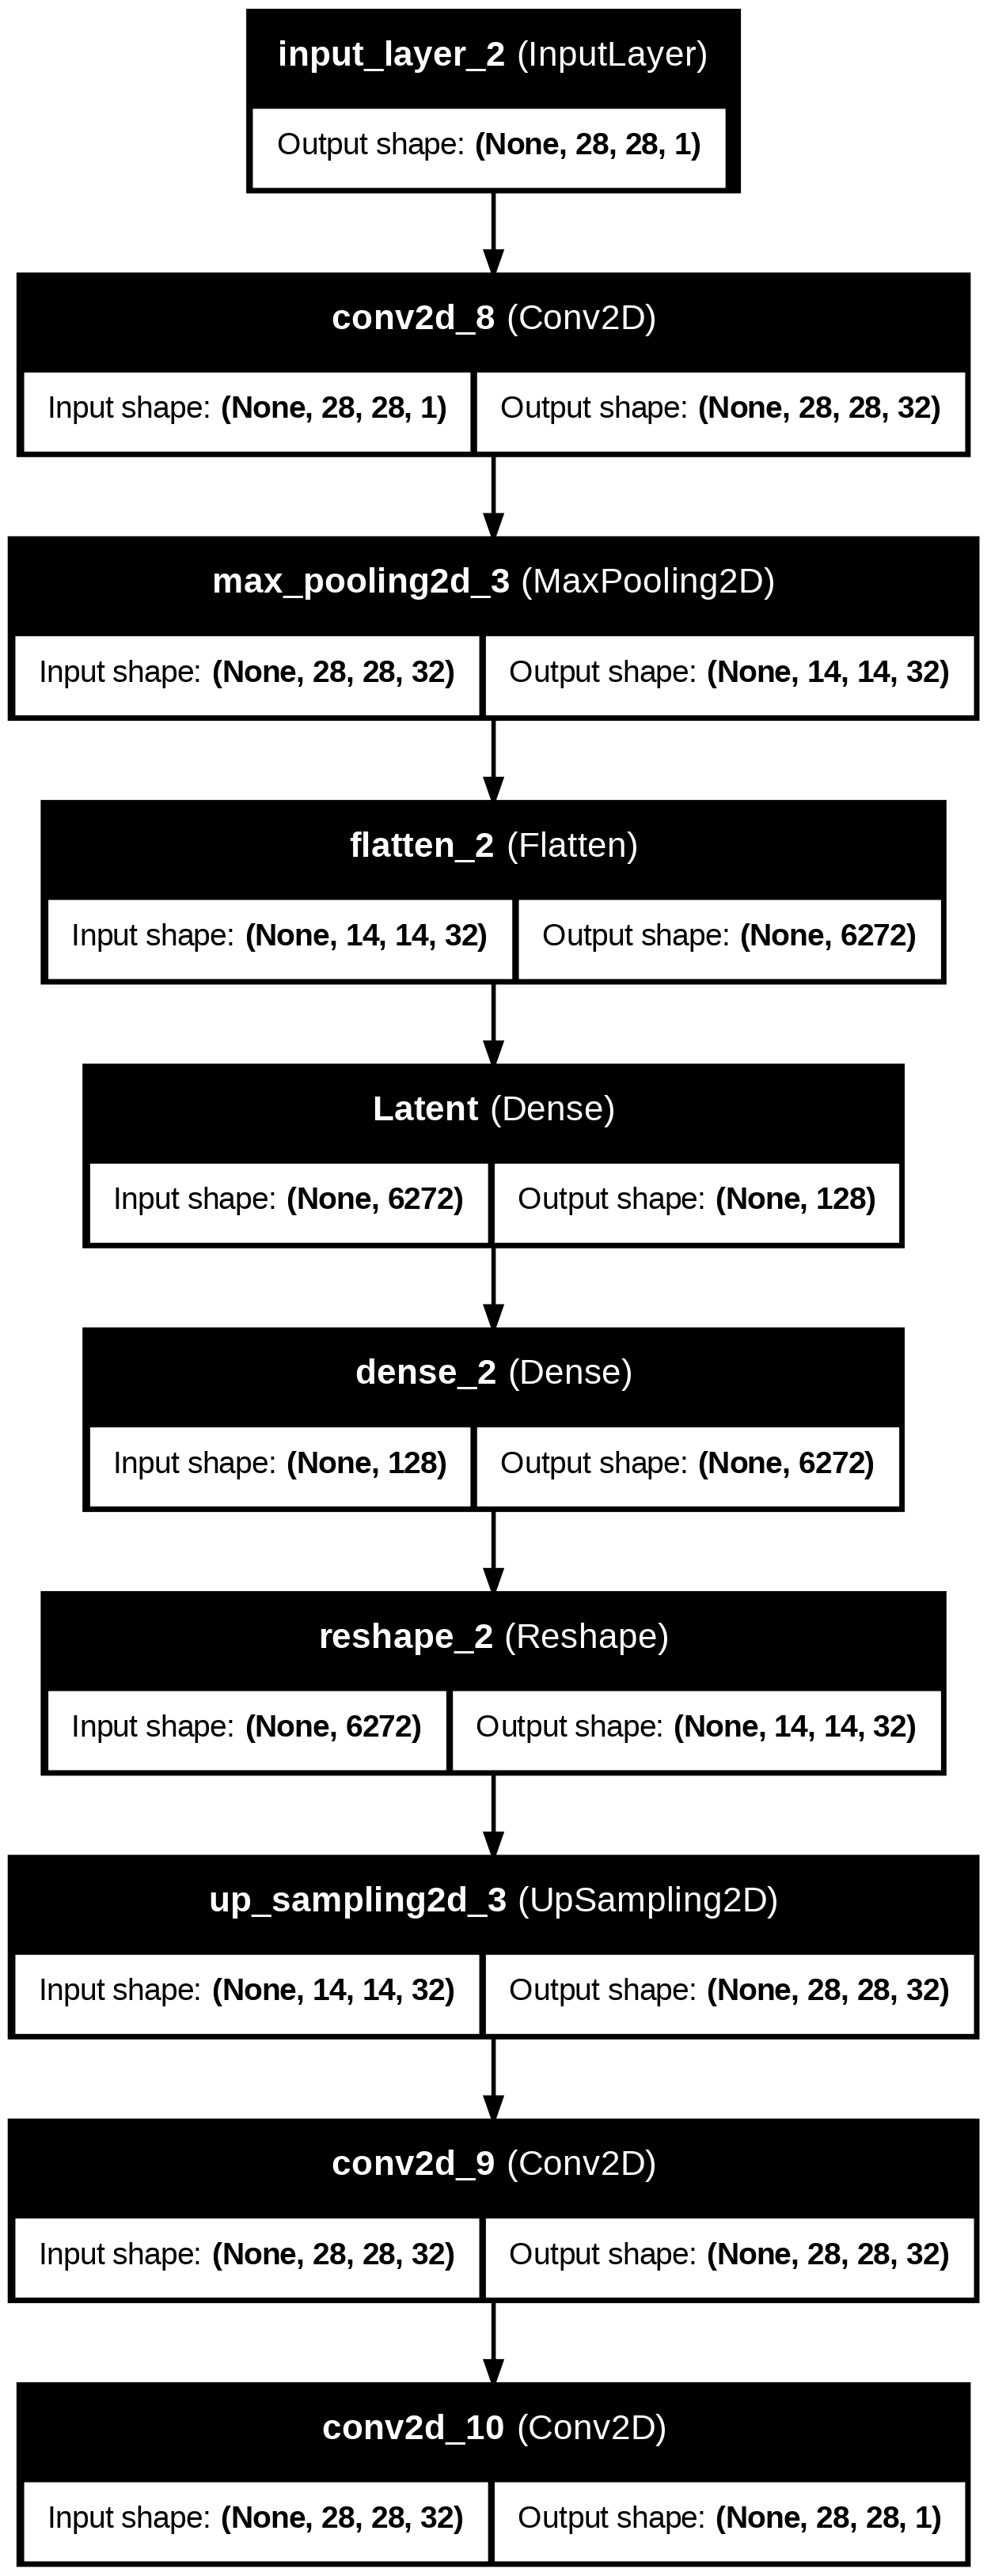

In [10]:
from IPython.display import Image
from tensorflow.keras.utils import model_to_dot
display(Image(data=model_to_dot(autoencoder, show_shapes=True, show_layer_names=True).create_png()))

In [4]:
# Train the model
history = autoencoder.fit(
    x_train, x_train,
    epochs=50,
    batch_size=256,
    validation_data=(x_val, x_val),
)

# Evaluate SSIM on test set
from skimage.metrics import structural_similarity as ssim
import numpy as np

reconstructed_test = autoencoder.predict(x_test)
ssim_scores = []

for i in range(len(x_test)):
    orig = x_test[i].reshape(28, 28)
    recon = reconstructed_test[i].reshape(28, 28)
    ssim_score = ssim(orig, recon, data_range=1.0)
    ssim_scores.append(ssim_score)

average_ssim = np.mean(ssim_scores)
print(f"Autoencoder SSIM: {average_ssim:.4f}")

Epoch 1/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 10s 77ms/step - loss: 0.0920 - val_loss: 0.0329
Epoch 2/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 4s 16ms/step - loss: 0.0282 - val_loss: 0.0179
Epoch 3/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0163 - val_loss: 0.0134
Epoch 4/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0126 - val_loss: 0.0111
Epoch 5/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0106 - val_loss: 0.0100
Epoch 6/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0093 - val_loss: 0.0091
Epoch 7/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0087 - val_loss: 0.0086
Epoch 8/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0083 - val_loss: 0.0081
Epoch 9/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0078 - val_loss: 0.0077
Epoch 10/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0073 - val_loss: 0.0073
Epoch 11/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0071 - val_loss: 0.0070
Epoch 12/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.

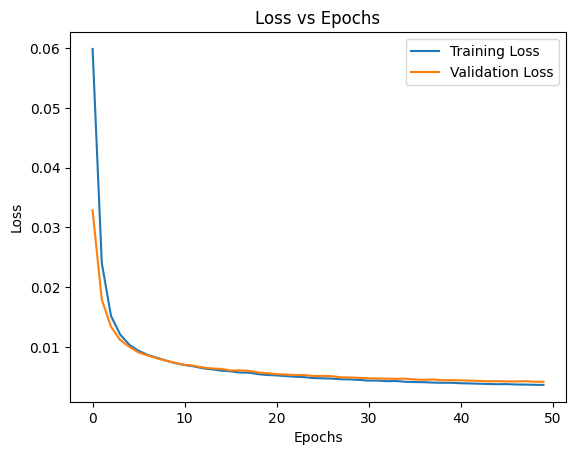

In [7]:
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss vs Epochs')
plt.show()

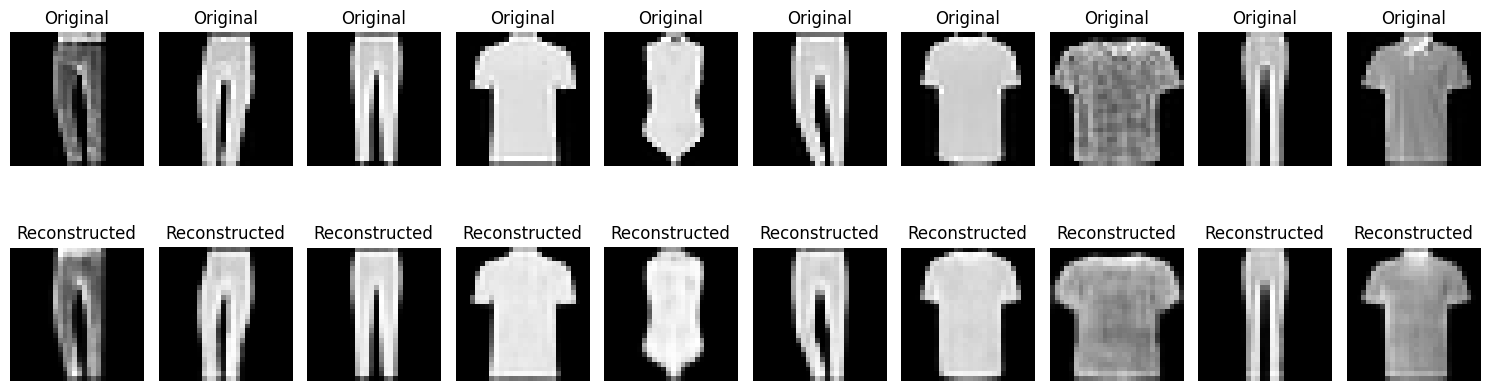

In [5]:
import matplotlib.pyplot as plt
import numpy as np

# Function to plot original and reconstructed images
def plot_original_and_reconstructed(originals, reconstructions, num_images=10):

    plt.figure(figsize=(15, 5))
    for i in range(num_images):
        # Original image
        plt.subplot(2, num_images, i + 1)
        plt.imshow(originals[i].reshape(28, 28), cmap='gray')
        plt.title("Original")
        plt.axis('off')

        # Reconstructed image
        plt.subplot(2, num_images, i + 1 + num_images)
        plt.imshow(reconstructions[i].reshape(28, 28), cmap='gray')
        plt.title("Reconstructed")
        plt.axis('off')

    plt.tight_layout()
    plt.show()

# Plot the first 10 original and reconstructed images
plot_original_and_reconstructed(x_test, reconstructed_test, num_images=10)


1C Model Tuning

In [11]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, Reshape, UpSampling2D, BatchNormalization, LeakyReLU, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

# Encoder
input_img = Input(shape=(28, 28, 1))
x = Conv2D(32, (3, 3), padding='same', activation='relu')(input_img)
x = BatchNormalization()(x)
x = LeakyReLU()(x)
x = MaxPooling2D((2, 2), padding='same')(x)

x = Conv2D(64, (3, 3), padding='same', activation='relu')(x)
x = BatchNormalization()(x)
x = LeakyReLU()(x)
x = MaxPooling2D((2, 2), padding='same')(x)

x = Flatten()(x)
latent = Dense(128, activation='relu', name="Latent")(x)

# Decoder
x = Dense(7 * 7 * 64, activation='relu')(latent)
x = Reshape((7, 7, 64))(x)

x = UpSampling2D((2, 2))(x)
x = Conv2D(64, (3, 3), padding='same', activation=None)(x)
x = BatchNormalization()(x)
x = LeakyReLU()(x)

x = UpSampling2D((2, 2))(x)
x = Conv2D(32, (3, 3), padding='same', activation=None)(x)
x = BatchNormalization()(x)
x = LeakyReLU()(x)

output_img = Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

# Autoencoder Model
autoencoder = Model(input_img, output_img)
autoencoder.compile(optimizer=Adam(learning_rate=1e-3), loss='mse')

# Callbacks for tuning
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
lr_scheduler = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, verbose=1)

# Train the model
history = autoencoder.fit(
    x_train, x_train,
    epochs=50,
    batch_size=128,
    validation_data=(x_val, x_val),
    callbacks=[early_stopping, lr_scheduler]
)

# Evaluate SSIM on test set
from skimage.metrics import structural_similarity as ssim
import numpy as np

reconstructed_test = autoencoder.predict(x_test)
ssim_scores = []

for i in range(len(x_test)):
    orig = x_test[i].reshape(28, 28)
    recon = reconstructed_test[i].reshape(28, 28)
    ssim_score = ssim(orig, recon, data_range=1.0)
    ssim_scores.append(ssim_score)

average_ssim = np.mean(ssim_scores)
print(f"Modified Autoencoder SSIM: {average_ssim:.4f}")


Epoch 1/50
88/88 ━━━━━━━━━━━━━━━━━━━━ 12s 54ms/step - loss: 0.0568 - val_loss: 0.1000 - learning_rate: 0.0010
Epoch 2/50
88/88 ━━━━━━━━━━━━━━━━━━━━ 5s 20ms/step - loss: 0.0123 - val_loss: 0.1047 - learning_rate: 0.0010
Epoch 3/50
88/88 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 0.0088 - val_loss: 0.0859 - learning_rate: 0.0010
Epoch 4/50
88/88 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0075 - val_loss: 0.0524 - learning_rate: 0.0010
Epoch 5/50
88/88 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0067 - val_loss: 0.0240 - learning_rate: 0.0010
Epoch 6/50
88/88 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0061 - val_loss: 0.0120 - learning_rate: 0.0010
Epoch 7/50
88/88 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0056 - val_loss: 0.0074 - learning_rate: 0.0010
Epoch 8/50
88/88 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0054 - val_loss: 0.0063 - learning_rate: 0.0010
Epoch 9/50
88/88 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0053 - val_loss: 0.0053 - learning_rate: 0.0010
Epoch 10/50
88/88 

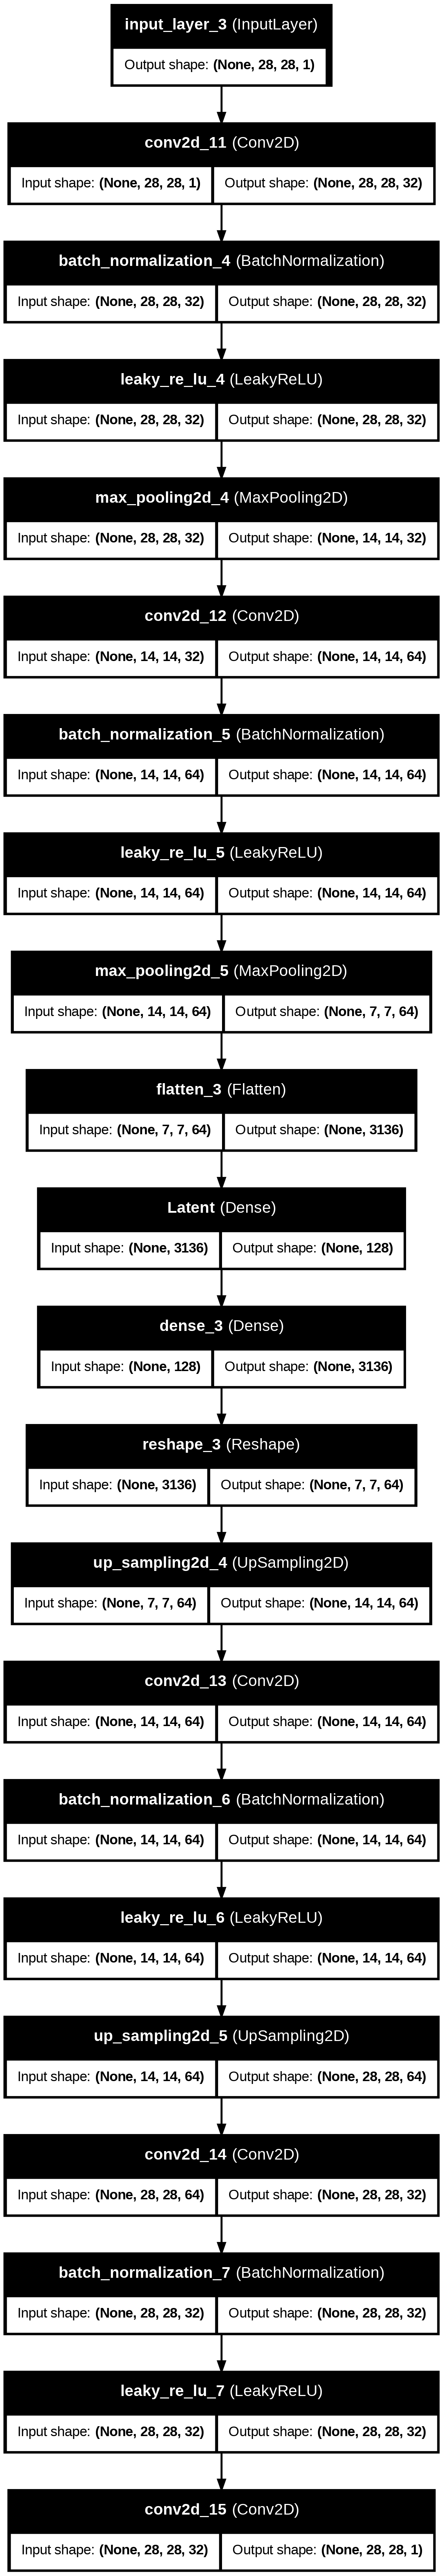

In [15]:
from IPython.display import Image
from tensorflow.keras.utils import model_to_dot
display(Image(data=model_to_dot(autoencoder, show_shapes=True, show_layer_names=True).create_png()))

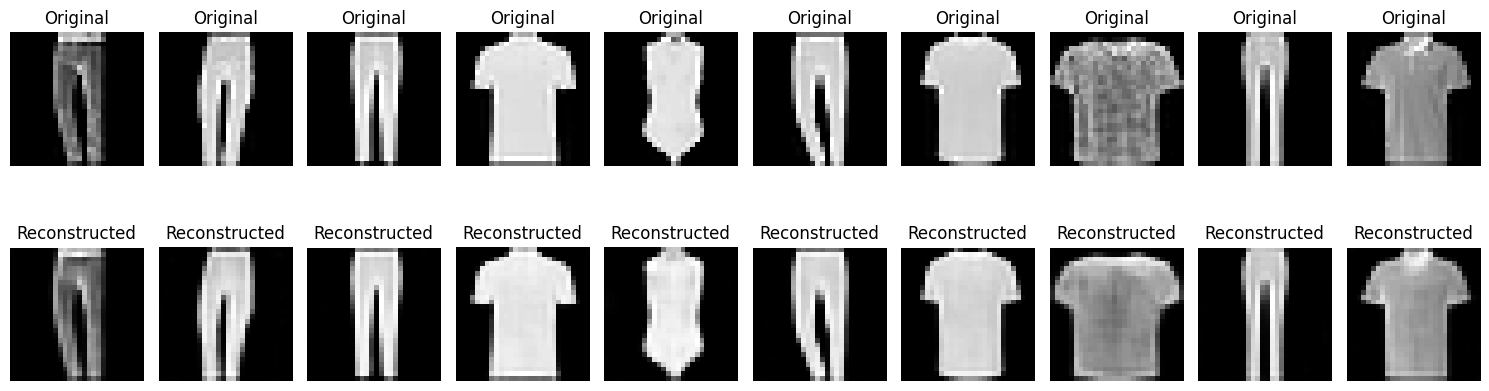

In [12]:
import matplotlib.pyplot as plt
import numpy as np

def plot_original_and_reconstructed(originals, reconstructions, num_images=10):

    plt.figure(figsize=(15, 5))
    for i in range(num_images):
        # Original image
        plt.subplot(2, num_images, i + 1)
        plt.imshow(originals[i].reshape(28, 28), cmap='gray')
        plt.title("Original")
        plt.axis('off')

        # Reconstructed image
        plt.subplot(2, num_images, i + 1 + num_images)
        plt.imshow(reconstructions[i].reshape(28, 28), cmap='gray')
        plt.title("Reconstructed")
        plt.axis('off')

    plt.tight_layout()
    plt.show()

plot_original_and_reconstructed(x_test, reconstructed_test, num_images=10)


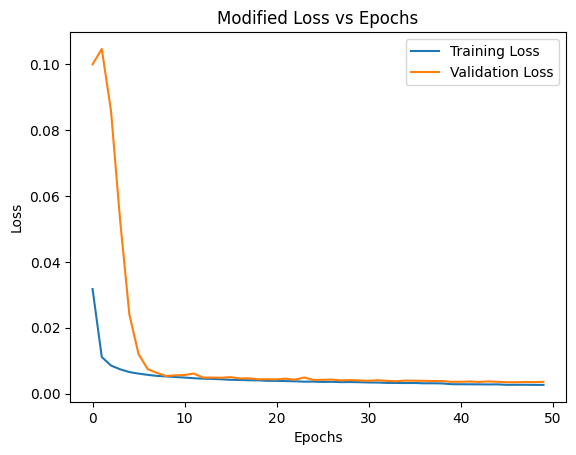

In [14]:
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Modified Loss vs Epochs')
plt.show()

# Analysis :

Pada pelatihan model pertama (Code A), **val_loss** mengalami penurunan di awal, namun kecepatannya menurun setelah beberapa epoch. Hal ini menunjukkan bahwa arsitektur dasar memiliki keterbatasan dalam merepresentasikan detail gambar, sehingga hasil rekonstruksinya kurang optimal. Rata-rata **SSIM (Structural Similarity Index)** yang diperoleh model ini adalah lebih rendah dibandingkan Code B.

Sementara itu, **Code B** menunjukkan peningkatan performa yang signifikan. Penurunan **val_loss** berlangsung lebih stabil dan konsisten, terutama karena penggunaan callback seperti **EarlyStopping** dan **ReduceLROnPlateau**. Rata-rata SSIM yang diperoleh model ini lebih tinggi, yang menunjukkan bahwa hasil rekonstruksi lebih akurat dan mendekati gambar asli.

Beberapa faktor yang berkontribusi pada perbedaan performa ini meliputi:

1. **Penggunaan Batch Normalization**  
   Pada Code B, Batch Normalization diterapkan setelah layer convolutional. Teknik ini membantu menstabilkan distribusi data antar layer selama proses pelatihan, mempercepat konvergensi, dan mengurangi risiko overfitting.

2. **Leaky ReLU sebagai Fungsi Aktivasi**  
   Code B menggunakan **Leaky ReLU** yang mengatasi masalah "dying ReLU" dengan memungkinkan gradien kecil untuk tetap diteruskan meskipun input bernilai negatif. Hal ini meningkatkan efisiensi propagasi gradien dan memberikan model kemampuan menangkap detail lebih baik.

3. **Arsitektur Encoder yang Lebih Dalam**  
   Code B menggunakan dua layer convolutional pada encoder dengan jumlah filter yang lebih besar (32 dan 64). Ini meningkatkan kapasitas model untuk menangkap fitur yang lebih kompleks dibandingkan arsitektur pada Code A yang hanya menggunakan satu layer convolutional.

4. **Decoder yang Lebih Detail**  
   Decoder pada Code B dirancang lebih mendalam dengan menambahkan beberapa layer convolutional, Batch Normalization, dan Leaky ReLU. Hal ini memberikan model kemampuan untuk merekonstruksi gambar dengan detail yang lebih tajam, sehingga meningkatkan kualitas SSIM.

5. **Penyesuaian Dimensi Latent Space**  
   Pada Code B, latent space dioptimalkan untuk menjaga proporsi dimensi yang lebih kecil (7x7x64) dibandingkan Code A (14x14x32). Hal ini memberikan representasi yang lebih efisien tanpa kehilangan banyak informasi penting.

6. **Learning Rate yang Diatur Dinamis**  
   Code B menggunakan scheduler (**ReduceLROnPlateau**) yang menurunkan learning rate saat **val_loss** tidak lagi membaik, sehingga membantu model untuk menghindari local minima dan meningkatkan performa secara keseluruhan.

### Hasil Rekonstruksi  
Pada perbandingan visual, hasil rekonstruksi dari Code A cenderung terlihat buram dan kurang mendekati gambar asli, terutama pada detail halus seperti tepi dan tekstur. Sebaliknya, Code B menghasilkan rekonstruksi yang lebih tajam, dengan detail yang lebih baik dan kemiripan yang lebih tinggi terhadap gambar asli.

### Kesimpulan  
Modifikasi arsitektur pada Code B, termasuk Batch Normalization, Leaky ReLU, dan arsitektur encoder-decoder yang lebih dalam, adalah faktor utama yang meningkatkan performa model. Dengan rata-rata skor **SSIM** yang lebih tinggi, Code B lebih unggul dalam mempertahankan kualitas visual dan detail gambar dibandingkan Code A.